Final Project 1  ~ Dimas Rifai Lombu


Dataset yang digunakan pada final project 1 yaitu dataset [Uber and Lyft Dataset Boston, MA](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma) yang terdiri dari 57 kolom dan 693.071 data.

**Objektif yang ingin dicapai dari final project 1 ini yaitu mengevaluasi konsep regression sebagai berikut :**

1. Mampu memahami konsep regression dengan Linear Regression
2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi

## Import Library & Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
pd.set_option("display.max_columns", None)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Data Cleaning

#### Mengecek missing value pada data

In [4]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

#### Menghitung proporsi missing value pada variabel **price**

In [5]:
print(df['price'].isnull().sum()/df.shape[0] * 100, '%')

7.949402009317949 %


#### Melakukan penanganan missing value pada variabel **price**

In [6]:
price = df["price"].fillna(df["price"].mean())
df= df.drop(["price"], axis=1)
df = df.assign(price = price.values)

#### Mengecek kembali apakah masih terdapat missing value pada data atau tidak

In [7]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

In [8]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime                       25
visibility  

In [9]:
def correlation(dataset, nilai):
    col_corr = set()  # Set dari semua nama kolom yang berkorelasi
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > nilai: # mengambil nilai coeff
                colname = corr_matrix.columns[i]  # mengambil nama kolom
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(df, 0.9)
corr_features

{'apparentTemperature',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'sunriseTime',
 'sunsetTime',
 'temperatureHighTime',
 'temperatureLowTime',
 'temperatureMax',
 'temperatureMaxTime',
 'temperatureMinTime',
 'uvIndexTime',
 'visibility.1',
 'windGust',
 'windGustTime'}

In [11]:
df = df.drop(corr_features,axis=1)

In [12]:
df = df.drop(['id','timestamp','datetime','timezone'],axis=1)

In [13]:
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,price
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,10.000,43.68,34.19,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,39.89,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,0.44,1.0,42.2148,-71.033,43.58,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,4.786,47.30,42.10,rain,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,40.49,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,0.44,1.0,42.2148,-71.033,38.33,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,10.000,47.55,33.10,clear-night,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,35.36,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,0.44,1.0,42.2148,-71.033,34.38,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,10.000,45.03,28.90,clear-night,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,34.67,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,10.000,42.18,36.71,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,33.10,9.0


- Terdapat missing value pada variabel price sebanyak 55095
- Dilakukan penanganan dengan melakukan drop pada missing value yang ada
- Dilakukan penghapusan variabel yang memiliki kesamaan dan dapat diwakilkan dengan atribut lainnya

## Exploratory Data Analysis

In [14]:
df.describe()

,hour,day,month,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,price
count,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,11.619137,17.794365,11.586684,2.189430,1.013870,42.338172,-71.066151,39.584388,0.008922,0.146076,0.741119,6.186253,8.467970,45.040982,34.150736,31.656256,1010.094766,220.055853,0.686502,0.248908,313.513635,0.579066,0.037374,33.457774,16.545125
std,6.948114,9.982286,0.492429,1.138937,0.091641,0.047840,0.020302,6.726084,0.026901,0.328938,0.138595,3.148223,2.602888,5.996541,6.383163,9.142355,13.472899,99.102736,0.358534,0.474097,27.953061,0.244705,0.055214,6.467224,8.946069
min,0.000000,1.000000,11.000000,0.020000,1.000000,42.214800,-71.105400,18.910000,0.000000,0.000000,0.380000,0.450000,0.717000,32.680000,17.850000,4.390000,988.090000,2.000000,0.000000,0.000000,269.400000,0.090000,0.000000,15.630000,2.500000
25%,6.000000,13.000000,11.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,0.000000,0.000000,0.640000,3.410000,8.432000,42.570000,30.170000,27.490000,999.820000,124.000000,0.370000,0.000000,290.900000,0.300000,0.000000,30.170000,9.500000
50%,12.000000,17.000000,12.000000,2.160000,1.000000,42.351900,-71.063100,40.490000,0.000000,0.000000,0.710000,5.910000,9.880000,44.680000,34.180000,30.690000,1009.250000,258.000000,0.820000,0.000000,307.400000,0.680000,0.000400,34.240000,16.000000
75%,18.000000,28.000000,12.000000,2.920000,1.000000,42.364700,-71.054200,43.580000,0.000000,0.000000,0.880000,8.410000,9.996000,46.910000,38.730000,38.120000,1021.860000,303.000000,1.000000,0.000000,331.800000,0.790000,0.091600,38.880000,22.500000
max,23.000000,30.000000,12.000000,7.860000,3.000000,42.366100,-71.033000,57.220000,0.144700,1.000000,0.960000,15.000000,10.000000,57.870000,46.600000,50.670000,1035.550000,356.000000,1.000000,2.000000,378.900000,0.930000,0.145900,43.100000,97.500000


In [15]:
df.corr()

,hour,day,month,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,price
hour,1.000000,0.066090,-0.079379,0.002280,-0.000077,0.019493,-0.006295,0.218769,-0.233349,-0.129725,-0.275762,0.072778,0.174129,0.005172,0.015326,0.004839,-0.067366,0.036089,0.026525,0.330209,0.034164,0.020483,0.019940,0.015513,0.000538
day,0.066090,1.000000,-0.861306,-0.000627,0.001389,0.006838,0.078690,-0.084116,0.091664,0.030903,-0.093340,0.440502,0.104992,-0.283561,-0.088320,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.377057,-0.007260,0.145568,0.038076,-0.000693
month,-0.079379,-0.861306,1.000000,0.002298,-0.000628,0.085791,-0.126912,-0.081774,-0.154531,-0.098031,-0.022256,-0.334803,0.011493,0.068313,-0.138732,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,-0.149333,-0.452469,-0.213054,-0.191803,0.000876
distance,0.002280,-0.000627,0.002298,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.000256,0.000371,-0.003901,0.002277,0.004092,-0.004154,-0.002146,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.001467,-0.004594,0.000648,-0.003396,0.330038
surge_multiplier,-0.000077,0.001389,-0.000628,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.001530,-0.002769,-0.001676,0.002511,0.001714,-0.001897,-0.002601,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.003324,-0.000150,-0.000101,-0.000724,0.240220
latitude,0.019493,0.006838,0.085791,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.074181,-0.071275,-0.117481,-0.097139,0.124166,-0.115307,-0.032133,-0.130234,0.149110,-0.032318,-0.064464,0.010698,0.063231,-0.199310,-0.047535,-0.114185,0.002004
longitude,-0.006295,0.078690,-0.126912,-0.000293,-0.001829,-0.531259,1.000000,0.012183,0.130840,0.122355,0.090847,0.092797,-0.097031,0.007527,0.078306,0.056191,-0.085665,-0.034877,0.073458,0.010109,-0.022658,0.104584,0.030753,0.048723,-0.001360
temperature,0.218769,-0.084116,-0.081774,-0.002884,-0.001572,-0.098604,0.012183,1.000000,0.182724,0.239165,0.313853,0.058655,-0.324087,0.788706,0.502326,0.863992,-0.339210,-0.244371,0.355156,0.158526,-0.291277,0.345306,0.333081,0.789261,-0.000081
precipIntensity,-0.233349,0.091664,-0.154531,-0.000256,-0.001530,-0.074181,0.130840,0.182724,1.000000,0.838470,0.417558,0.307369,-0.600663,0.119129,0.231751,0.338755,-0.143718,-0.433327,0.288960,-0.099118,-0.222314,0.077861,0.498788,0.236578,0.000159
precipProbability,-0.129725,0.030903,-0.098031,0.000371,-0.002769,-0.071275,0.122355,0.239165,0.838470,1.000000,0.548766,0.252117,-0.761259,0.147960,0.246468,0.445270,-0.179500,-0.470181,0.387114,-0.071009,-0.235319,0.084624,0.583335,0.274337,-0.000233


In [16]:
df2 = df.groupby(by=['cab_type', 'name']).size().reset_index(name='jumlah')
df2

,cab_type,name,jumlah
0,Lyft,Lux,51235
1,Lyft,Lux Black,51235
2,Lyft,Lux Black XL,51235
3,Lyft,Lyft,51235
4,Lyft,Lyft XL,51235
5,Lyft,Shared,51233
6,Uber,Black,55095
7,Uber,Black SUV,55096
8,Uber,Taxi,55095
9,Uber,UberPool,55091


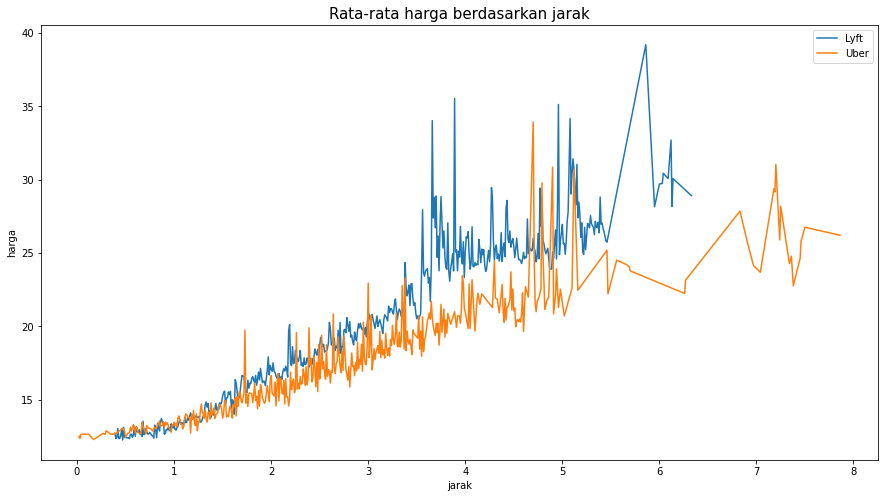

In [17]:
fig , ax = plt.subplots(figsize = (15,8))
ax.plot(df[df['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df[df['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df[df['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df[df['cab_type'] =='Uber'].groupby('distance')['price'].mean(), label = 'Uber')
ax.set_title('Rata-rata harga berdasarkan jarak', fontsize= 15)
ax.set(xlabel = 'jarak', ylabel = 'harga' )
ax.legend()
plt.show()

- Rata-rata pemesanan Taksi Online dilakukan pada jam 11
- jarak terjauh pemesanan Taksi Online yakni 7.86 miles  
- Harga tertinggi pada pemesanan Taksi Online yakni sebesar 97.5 dollar
- Lyft dan Uber memiliki jumlah yang hampir sama pada setiap jenis kendaraanya
- Dari grafik rata-rata harga berdasarkan jarak, dapat dilihat bahwa semakin tinggi jarak tempuh maka semakin besar harganya maka kolom distance cocok untuk dijadikan model linear regression

## Data Preprocessing

In [18]:
df_new = df[[ "product_id","name", "distance",
             "cab_type","source","destination",
             "surge_multiplier", "icon", "hour", 
             "temperature", "price"]]
df_new.head()

,product_id,name,distance,cab_type,source,destination,surge_multiplier,icon,hour,temperature,price
0,lyft_line,Shared,0.44,Lyft,Haymarket Square,North Station,1.0,partly-cloudy-night,9,42.34,5.0
1,lyft_premier,Lux,0.44,Lyft,Haymarket Square,North Station,1.0,rain,2,43.58,11.0
2,lyft,Lyft,0.44,Lyft,Haymarket Square,North Station,1.0,clear-night,1,38.33,7.0
3,lyft_luxsuv,Lux Black XL,0.44,Lyft,Haymarket Square,North Station,1.0,clear-night,4,34.38,26.0
4,lyft_plus,Lyft XL,0.44,Lyft,Haymarket Square,North Station,1.0,partly-cloudy-night,3,37.44,9.0


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_id        693071 non-null  object 
 1   name              693071 non-null  object 
 2   distance          693071 non-null  float64
 3   cab_type          693071 non-null  object 
 4   source            693071 non-null  object 
 5   destination       693071 non-null  object 
 6   surge_multiplier  693071 non-null  float64
 7   icon              693071 non-null  object 
 8   hour              693071 non-null  int64  
 9   temperature       693071 non-null  float64
 10  price             693071 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 58.2+ MB


In [20]:
num = [var for var in df_new.columns if df_new[var].dtype!='O']
print(num)

['distance', 'surge_multiplier', 'hour', 'temperature', 'price']


In [21]:
for col in ['distance', 'surge_multiplier', 'hour', 'temperature']:
    minus = df_new[col].min()
    maxim = df_new[col].max()
    
    df_new[col] = df_new[col].apply(lambda v: (v - minus)/(maxim - minus))

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
kategori = [var for var in df_new.columns if df_new[var].dtype=='O']
print(kategori)

['product_id', 'name', 'cab_type', 'source', 'destination', 'icon']


In [23]:
def encoding_data(df_new):
    #import library
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # encode kolom categorical 
    df_encode = pd.DataFrame(encoder.fit_transform(df_new[kategori]))
    #mengambil nama sesuai kategori
    df_encode.columns = encoder.get_feature_names(kategori)
    
    #menghapus kolom yang ada di array kategorical
    new_df = df_new.drop(kategori ,axis=1)
    
    #menggambungkan kolom baru yang sudah di encode dan kolom lama
    new_df = pd.concat([df_encode, new_df], axis=1)
    return new_df

In [24]:
onehot_data = encoding_data(df_new)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
onehot_data

,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,distance,surge_multiplier,hour,temperature,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.053571,0.0,0.391304,0.611590,5.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.053571,0.0,0.086957,0.643957,11.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.053571,0.0,0.043478,0.506917,7.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.053571,0.0,0.173913,0.403811,26.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.053571,0.0,0.130435,0.483686,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125000,0.0,1.000000,0.473506,13.000000
693067,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125000,0.0,1.000000,0.473506,9.500000
693068,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125000,0.0,1.000000,0.473506,16.545125
693069,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [26]:
onehot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 64 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e  693071 non-null  float64
 1   product_id_6c84fd89-3f11-4782-9b50-97c468b19529  693071 non-null  float64
 2   product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546  693071 non-null  float64
 3   product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969  693071 non-null  float64
 4   product_id_8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  693071 non-null  float64
 5   product_id_997acbb5-e102-41e1-b155-9df7de0a73f2  693071 non-null  float64
 6   product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d  693071 non-null  float64
 7   product_id_lyft                                  693071 non-null  float64
 8   product_id_lyft_line                             693071 non-null  float64
 9   product_id_lyft

## Model Training & Evaluation

In [27]:
x_train,x_test,y_train,y_test= train_test_split(
    onehot_data.drop(labels=['price'], axis=1),
    onehot_data['price'],
    test_size=0.2,
    random_state=0)

In [28]:
#membuat model dan fit modelnya
lin_reg = LinearRegression()
model = lin_reg.fit(x_train, y_train)

In [29]:
print("slope: ", lin_reg.coef_)

print("Intercept: ", lin_reg.intercept_)

slope:  [-8.96176416e+10  1.04698047e+12  4.24148073e+11 -9.65932906e+11
 -1.31106322e+11  8.82499591e+10  4.27311980e+11  3.72112085e+10
  1.61373371e+13 -2.20915596e+11  6.68546002e+11  9.99763585e+11
  3.61546028e+11 -1.36906821e+12 -7.46235805e+11  2.35510703e+11
  8.17972328e+11 -7.14892699e+10  5.59845523e+11 -4.02706853e+11
 -1.55402804e+13 -1.90981411e+11 -4.10337692e+11 -2.32470091e+11
  6.43845173e+11 -7.49399712e+11 -8.86286347e+11  3.28581172e+10
  1.22914212e+12  1.22914212e+12 -1.15955634e+12 -1.15955634e+12
  1.22914212e+12 -1.15955634e+12 -1.15955634e+12  1.22914212e+12
 -1.15955634e+12 -1.15955634e+12  1.22914212e+12  1.22914212e+12
  6.07355152e+11  6.07355152e+11 -1.78134331e+12 -1.78134331e+12
  6.07355152e+11 -1.78134331e+12 -1.78134331e+12  6.07355152e+11
 -1.78134331e+12 -1.78134331e+12  6.07355152e+11  6.07355152e+11
  1.30965665e+13  1.30965665e+13  1.30965665e+13  1.30965665e+13
  1.30965665e+13  1.30965665e+13  1.30965665e+13  2.05709229e+01
  3.67724609e+01 

In [30]:
lin_reg.score(x_train, y_train)

0.9184400874727876

In [31]:
y_test = lin_reg.predict(x_test)
print("predict response: ", y_test, sep="\n")

predict response: 
[ 6.75585938 36.14257812 12.60351562 ... 24.34570312  6.9140625
  5.60742188]


In [32]:
import pickle
pickle.dump(lin_reg, open('model.pkl','wb'))

## Conclusion

- Terdapat 57 atribut yang diasumsikan memengaruhi tarif taksi online. Setelah dilakukan analisis, diambil 10 atribut/faktor yang paling berpengaruh dalam model
- Model yang digunakan adalah Multiple Linear Regression dengan membagi data train sebesar 80% dan data test sebesar 20%
- Diperoleh Koefisien determinasi (𝑅²) dari model yaitu 0.9184 yang berarti bahwa variabel digunakan merupakan faktor-faktor yang mempengaruhi price sebesar 91,84%, sedangkan 8,16% sisanya dipengaruhi oleh faktor lain.